<a href="https://colab.research.google.com/github/azkbrqlna/2025-PBO-Praktikum/blob/main/Jobsheet3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JOBSHEET 03: KONSTRUKTOR, DESTRUKTOR, DAN ENKAPSULASI

## A.	Tujuan Instruksional Khusus
Setelah menyelesaikan praktikum ini, mahasiswa diharapkan mampu:
1.	Menjelaskan dan menggunakan konstruktor (  init  ) dan destruktor (  del  )
2.	Memahami peran self dalam method sebuah kelas
3.	Menerapkan konsep enkapsulasi (encapsulation) dalam Python
4.	Menggunakan getter, setter, dan dekorator @property untuk mengelola akses atribut


## B. Langkah Praktikum

### Praktikum 01: Enkapsulasi pada kelas Bank Account

Berikut adalah contoh sederhana dalam Python yang mendemonstrasikan proses enkapsulasi (encapsulation). Enkapsulasi adalah konsep yang bertujuan untuk “menyembunyikan” atau melindungi data (atribut) di dalam suatu objek agar tidak diakses secara langsung di luar kelas, serta menyediakan metode (fungsi) khusus untuk memanipulasi data tersebut. UML kelas diagram kelas BankAccount.


•	Atribut Privat:

o	 owner: str
Menyimpan nama pemilik akun (tipe data string).

o	 balance: int
Menyimpan saldo akun (tipe data integer).

•	Metode Publik:
o	 init (owner: str, balance: int)
Konstruktor yang digunakan untuk menginisialisasi objek dengan parameter
owner dan balance.

o	deposit(amount: int): None
Metode untuk menambahkan saldo ke akun. Jika nilai amount lebih dari 0, maka nilai tersebut ditambahkan ke  balance.

o	withdraw(amount: int): None
Metode untuk menarik saldo. Melakukan validasi agar jumlah penarikan tidak melebihi saldo yang tersedia.

o	get_balance(): int
Metode untuk mengambil nilai saldo akun saat ini.
Diagram di atas memberikan gambaran mengenai struktur kelas BankAccount serta cara kerja enkapsulasi dalam mengatur atribut dan metode di dalam kelas.

Kemudian untuk kode praktikum dalam python dapat dilihat sebagai berikut:


In [ ]:
class BankAccount:
    def __init__(self, owner, balance):
        self.__owner = owner
        self.__balance = balance

    def deposit(self, amount):
        """Method untuk menambahkan saldo."""
        if amount > 0:
            self.__balance += amount
            print(f"{amount} telah ditambahkan ke akun {self.__owner}.")
        else:
            print("Jumlah deposit harus lebih dari 0.")

    def withdraw(self, amount):
        """Method untuk menarik saldo."""
        if amount <= self.__balance:
            self.__balance -= amount
            print(f"{amount} telah ditarik dari akun {self.__owner}.")
        else:
            print("Saldo tidak mencukupi.")

    def get_balance(self):
        """Method untuk mendapatkan informasi saldo terkini."""
        return self.__balance

# contoh penggunaan
if __name__ == "__main__":
    # Membuat objek BankAccount dengan owner="Alice" dan balance awal
    alice_account = BankAccount(owner="Alice", balance=1000)

    # Deposit uang
    alice_account.deposit(500)     # Berhasil
    alice_account.deposit(-100)    # Gagal (validasi)

    # Withdraw uang
    alice_account.withdraw(300)    # Berhasil
    alice_account.withdraw(2000)   # Gagal (saldo tidak cukup)

    # Mendapatkan saldo
    current_balance = alice_account.get_balance()
    print(f"Saldo terakhir di akun Alice: {current_balance}")


  # Mencoba mengakses atribut 'private' langsung (tidak direkomendasikan)
  # alice_account.  balance # Akan error
  # Karena Python “mangling” nama atribut __balance menjadi BankAccount__balance
  # Ini adalah salah satu mekanisme enkapsulasi sederhana di Python.

500 telah ditambahkan ke akun Alice.
Jumlah deposit harus lebih dari 0.
300 telah ditarik dari akun Alice.
Saldo tidak mencukupi.
Saldo terakhir di akun Alice: 1200


#### Penjelasan
1.	Atribut Private: Di Python, penulisan  nama_atribut membuat nama atribut tersebut di-“mangled” sehingga tidak dapat diakses langsung dari luar kelas dengan nama aslinya. Contoh:  balance menjadi _BankAccount balance. Ini bukan perlindungan mutlak, tetapi menjadi sinyal kuat bahwa atribut tersebut tidak untuk diakses sembarangan.
2.	Metode Akses (Get/Set): Konsep “getter” atau “setter” diterapkan untuk mengontrol validasi  dan  logika  ketika  atribut  diubah.  Di  contoh  ini, method deposit() dan withdraw() melindungi  balance dari perubahan langsung dengan menambahkan sejumlah kondisi (validasi).
3.	Keuntungan Enkapsulasi:

  •	Memudahkan perawatan kode (maintenance) karena data tidak diubah sembarangan.

  •	Mempermudah menambahkan validasi/pengecekan keamanan (security check).

  • Mengontrol akses terhadap data, sehingga lebih mudah dikelola.
Meski Python tidak memiliki sistem enkapsulasi “private”/“protected” secara ketat seperti beberapa bahasa pemrograman lain, penulisan underscore ganda dan pendekatan getter/setter tetap menjadi praktik umum untuk menegaskan bahwa atribut atau metode tersebut bersifat internal.



### Praktikum 02: Enkapsulasi pada kelas Employee

Berikut ini adalah contoh lain tentang enkapsulasi dalam Python menggunakan kelas Employee yang menyembunyikan data karyawan, seperti nama dan gaji, dari akses langsung di luar kelas. Pada contoh ini, kita menyediakan method khusus (getter dan setter) untuk mengakses dan memodifikasi data privat. UML kelas diagram untuk Employee Class.

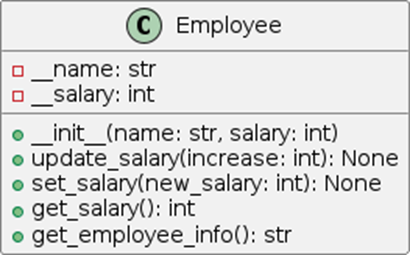

•	Atribut Privat (-):

o	  name: str → Menyimpan nama karyawan.

o	  salary: int → Menyimpan gaji karyawan.

•	Metode Publik (+):

o	  init  (name, salary) → Konstruktor untuk inisialisasi nama dan gaji.

o	update_salary(increase) → Menambahkan gaji jika nilai kenaikan valid.

o	set_salary(new_salary) → Mengatur ulang gaji dengan validasi.

o	get_salary() → Mengembalikan nilai gaji saat ini.

o	get_employee_info() → Menampilkan info lengkap tentang karyawan.


In [ ]:
class Employees:
    def __init__(self, name, salary):
        self._name = name
        self.__salary = salary

    def update_salary(self, increase):
        """Method untuk menaikkan gaji dengan validasi."""
        if increase > 0:
            self.__salary += increase
            print(f"Gaji telah dinaikkan sebesar {increase}.")
        else:
            print("Nilai kenaikan harus lebih dari 0.")

    def set_salary(self, new_salary):
        """Method untuk mengubah gaji dengan validasi."""
        if new_salary >= 0:
            self.__salary = new_salary
            print(f"Gaji diatur ulang menjadi {new_salary}.")
        else:
            print("Gaji tidak dapat bernilai negatif.")

    def get_salary(self):
        """Method untuk mendapatkan informasi gaji."""
        return self.__salary

    def get_employee_info(self):
        """Method untuk menampilkan informasi karyawan secara menyeluruh."""
        return f"Employee: {self._name}, Gaji: {self.__salary}"

# Contoh penggunaan
if __name__ == "__main__":
    # Membuat objek Employee dengan nama "John Doe" dan gaji awal 50000
    employee1 = Employees("John Doe", 50000)

    # Tampilkan informasi karyawan
    print(employee1.get_employee_info())

    # Update gaji dengan menaikkan sebesar 5000
    employee1.update_salary(5000)
    print(f"Gaji setelah kenaikan: {employee1.get_salary()}")

    # Atur ulang gaji dengan nilai baru
    employee1.set_salary(60000)
    print(f"Informasi terbaru: {employee1.get_employee_info()}")

    # Mencoba mengakses atribut privat secara langsung (tidak direkomendasikan)
    # Contoh: print(employee1.__salary) --> Ini akan menimbulkan error

Employee: John Doe, Gaji: 50000
Gaji telah dinaikkan sebesar 5000.
Gaji setelah kenaikan: 55000
Gaji diatur ulang menjadi 60000.
Informasi terbaru: Employee: John Doe, Gaji: 60000


#### Penjelasan
1.	Atribut Privat

  •	Atribut   name dan   salary dimulai dengan dua garis bawah (double underscore), yang menandakan bahwa atribut tersebut bersifat privat.

  •	Python melakukan name mangling sehingga atribut ini tidak dapat diakses secara langsung dari luar kelas, melainkan harus menggunakan method yang disediakan.

2.	Method untuk Memodifikasi Data

  •	update_salary(): Menambahkan nilai kenaikan ke gaji saat ini dengan validasi bahwa nilai kenaikan harus positif.

  •	set_salary(): Mengatur nilai gaji secara langsung asalkan nilai tersebut tidak negatif.

3.	Method untuk Mengakses Data

  •	get_salary(): Mengembalikan nilai gaji saat ini.

  •	get_employee_info(): Mengembalikan informasi lengkap tentang karyawan termasuk nama dan gaji.

4.	Keuntungan Enkapsulasi
  •	Data sensitif seperti gaji disembunyikan sehingga hanya dapat diubah melalui method yang telah ditentukan.

  •	Validasi data dilakukan di dalam method untuk menjaga agar nilai yang tidak valid tidak masuk ke atribut.

  •	Menjaga integritas data dan memudahkan perawatan kode.
  
Dengan pendekatan ini, kita memastikan bahwa data dalam objek Employee aman dari modifikasi secara langsung dari luar kelas dan hanya dapat diubah melalui operasi yang telah diatur sesuai logika bisnis.


### Praktikum 03: Konstruktor dan Destruktor Sederhana

Berikut adalah contoh program sederhana yang mendemonstrasikan cara kerja konstruktor dan destruktor dalam Python:

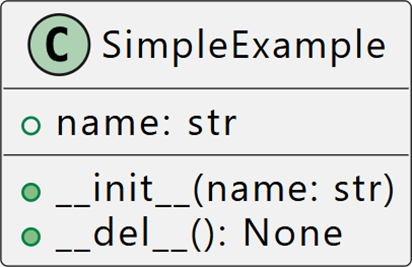

1. Atribut:

  •	name: str → Atribut publik yang disimpan saat objek dibuat.

2. Method:

  •	`__init__`(name: str) → Konstruktor yang dipanggil saat objek diinisialisasi.

  •	`__del__`() → Destruktor yang dipanggil saat objek dihapus (baik secara eksplisit dengan del atau otomatis oleh garbage collector).


In [1]:
class SimpleExample:
    def __init__(self, name):
        """
        Konstruktor: Dipanggil saat objek dibuat.
        Menyimpan nilai 'name' dan mencetak pesan pembuatan objek.
        """
        self.name = name
        print(f"Konstruktor: Objek '{self.name}' telah dibuat.")

    def __del__(self):
        """
        Destruktor: Dipanggil saat objek dihapus.
        Mencetak pesan bahwa objek sedang dihapus.
        """
        print(f"Destruktor: Objek '{self.name}' sedang dihapus.")


def main():
    print("Program dimulai.\n")

    # Membuat objek SimpleExample
    obj = SimpleExample("Demo")
    print("Program sedang berjalan...\n")

    # Menghapus objek secara eksplisit
    del obj
    print("Objek telah dihapus secara eksplisit.\n")

    print("Program selesai.")


if __name__ == "__main__":
    main()

Program dimulai.

Konstruktor: Objek 'Demo' telah dibuat.
Program sedang berjalan...

Destruktor: Objek 'Demo' sedang dihapus.
Objek telah dihapus secara eksplisit.

Program selesai.


#### Penjelasan
1.	Konstruktor (`__init__`):
Saat objek dibuat dengan SimpleExample("Demo"), Python secara otomatis memanggil metode   init  , yang mencetak pesan bahwa objek telah dibuat dan menyimpan atribut name.
2.	Destruktor (`__del__`):
Ketika perintah del obj dipanggil, objek dihapus secara eksplisit (meskipun pada kenyataannya Python akan menghapus objek ketika tidak ada lagi referensi), sehingga metode  `__del__` terpanggil dan mencetak pesan bahwa objek sedang dihapus.
3.	Alur Program:
Program memulai dengan pembuatan objek, melakukan beberapa operasi (di sini hanya mencetak beberapa pesan), lalu menghapus objek dan menampilkan pesan bahwa objek telah dihapus.
Program ini memberikan gambaran yang sederhana mengenai bagaimana konstruktor dan destruktor bekerja di Python untuk mengelola siklus hidup objek.


### Praktikum 04: Konstruktor dan Destruktor program FileLogger

Berikut adalah contoh lain yang lebih nyata, yakni simulasi pengelolaan koneksi jaringan. Dalam contoh ini, kelas NetworkConnection membuat "koneksi" ke sebuah alamat host dan port ketika objek dibuat (menggunakan konstruktor) dan menutup koneksi tersebut ketika objek dihapus (menggunakan destruktor). Selain itu, terdapat metode untuk mengirim dan menerima data melalui koneksi tersebut.

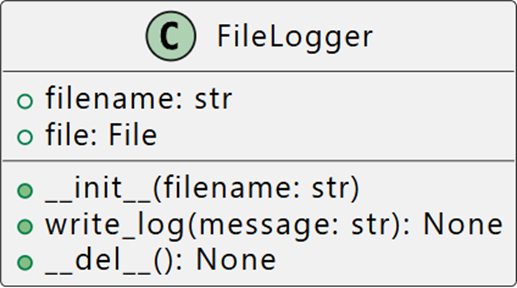

1. Atribut:

  •	filename: str → Nama file tempat log ditulis.

  •	file: File → Objek file yang dibuka dalam mode append ("a"), digunakan untuk menulis log.
2. Method:

  •	`__init__`(filename: str) → Konstruktor untuk membuka file log saat objek dibuat.

  •	write_log(message: str) → Menulis pesan log ke file dan flush ke disk.

  •	`__del__`() → Destruktor untuk menutup file saat objek dihapus.


In [2]:
class FileLogger:
    def __init__(self, filename):
        """
        Konstruktor: Membuka file log untuk menulis pesan.
        Parameter:
          - filename: Nama file tempat pesan log akan ditulis.
        """
        self.filename = filename
        try:
            self.file = open(filename, "a")  # Membuka file dalam mode append
            print(f"File '{filename}' berhasil dibuka untuk logging.")
        except Exception as e:
            print(f"Gagal membuka file '{filename}': {e}")

    def write_log(self, message):
        """
        Menulis pesan log ke dalam file.
        Parameter:
          - message: Pesan yang akan ditulis ke file.
        """
        self.file.write(message + "\n")
        self.file.flush()  # Memastikan pesan langsung ditulis ke disk
        print(f"Pesan log: '{message}' telah ditulis.")

    def __del__(self):
        """
        Destruktor: Menutup file log ketika objek dihapus.
        """
        if hasattr(self, "file") and not self.file.closed:
            self.file.close()
            print(f"File '{self.filename}' telah ditutup.")


# Contoh penggunaan dalam skenario nyata aplikasi
if __name__ == "__main__":
    # Membuat objek logger untuk file "application.log"
    logger = FileLogger("application.log")

    # Menulis beberapa pesan log selama operasi aplikasi
    logger.write_log("Aplikasi dimulai.")
    logger.write_log("Melakukan operasi A...")
    logger.write_log("Operasi A selesai.")
    logger.write_log("Aplikasi akan segera selesai.")

    # Menghapus objek logger secara eksplisit
    del logger

    # Jika objek tidak dihapus secara eksplisit, destruktor akan dipanggil
    # ketika program berakhir dan garbage collection membersihkan objek tersebut.


File 'application.log' berhasil dibuka untuk logging.
Pesan log: 'Aplikasi dimulai.' telah ditulis.
Pesan log: 'Melakukan operasi A...' telah ditulis.
Pesan log: 'Operasi A selesai.' telah ditulis.
Pesan log: 'Aplikasi akan segera selesai.' telah ditulis.
File 'application.log' telah ditutup.


#### Penjelasan

1. Konstruktor (`__init__`):

  • Saat objek NetworkConnection dibuat, konstruktor akan dijalankan untuk membuka koneksi
ke alamat host dan port yang diberikan.

  • Atribut self.connected diset ke True untuk menandakan koneksi aktif, dan delay
dengan time.sleep(1) digunakan untuk mensimulasikan proses inisialisasi koneksi.
2. Metode send_data dan receive_data:

  • send_data(data): Metode ini menampilkan pesan pengiriman data, mensimulasikan delay singkat, dan mengonfirmasi bahwa data telah dikirim selama koneksi dalam keadaan aktif.

  • receive_data(): Metode ini mensimulasikan penerimaan data dengan delay, mengembalikan pesan yang diterima, dan menampilkan hasilnya ke layar.
3. Destruktor (`__del__`):

  • Saat objek dihapus, destruktor akan dijalankan untuk menutup koneksi jika koneksi masih aktif.

  • Proses penutupan juga disimulasikan dengan delay, dan status koneksi diubah menjadi False.
4. Alur Program di Fungsi main():

  • Program dimulai dengan membuat objek NetworkConnection.

  • Setelah itu, program mengirim dan menerima data melalui koneksi yang telah dibuat.

  • Objek koneksi kemudian dihapus secara eksplisit dengan del conn, sehingga destruktor segera dipanggil untuk menutup koneksi.

  • Setelah menunggu sejenak, program selesai.

Contoh ini menggambarkan bagaimana konstruktor dan destruktor bekerja dalam konteks nyata, yaitu dalam
pengelolaan sumber daya (resource) berupa koneksi jaringan. Teknik ini penting untuk memastikan bahwa
resource dilepaskan dengan benar, menghindari kebocoran resource, dan menjaga integritas aplikasi.


### Praktikum 05: Properti "self" pada kelas



Berikut adalah contoh kode Python yang mendemonstrasikan peran dari self dalam metode
sebuah kelas. Kode ini menjelaskan bagaimana self digunakan untuk merujuk ke atribut dan
metode instance, sehingga setiap objek (instance) memiliki data dan perilaku yang independen.
Diagram UML Kelas Calculator sebagai berikut:

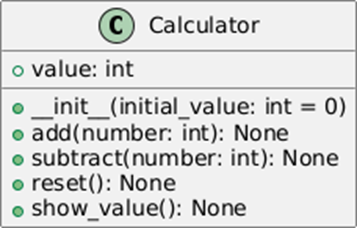

1. Atribut:

  •	value: int → Nilai saat ini yang disimpan dalam kalkulator (bersifat publik dalam kode Python).
2. Method:

  •	`__init__` (initial_value: int = 0) → Konstruktor untuk inisialisasi nilai awal kalkulator.

  •	add(number: int) → Menambahkan angka ke nilai saat ini.

  •	subtract(number: int) → Mengurangi angka dari nilai saat ini.

  •	reset() → Mengatur nilai kalkulator kembali ke nol.

  •	show_value() → Menampilkan nilai saat ini.


In [3]:
class Calculator:
    def __init__(self, initial_value=0):
        """
        Konstruktor kelas Calculator.
        - self: Mengacu pada instance yang dibuat.
        - initial_value: Nilai awal dari kalkulator.
        """
        self.value = initial_value
        print(f"Kalkulator diinisialisasi dengan nilai: {self.value}")

    def add(self, number):
        """
        Menambahkan 'number' ke nilai yang tersimpan di objek.
        - self.value: Menunjukkan nilai saat ini yang disimpan di objek tersebut.
        - number: Nilai yang akan ditambahkan.
        """
        self.value += number
        print(f"Setelah penambahan {number}, nilai sekarang adalah: {self.value}")

    def subtract(self, number):
        """
        Mengurangi 'number' dari nilai yang tersimpan.
        - self.value: Nilai saat ini dalam objek.
        - number: Nilai yang akan dikurangkan.
        """
        self.value -= number
        print(f"Setelah pengurangan {number}, nilai sekarang adalah: {self.value}")

    def reset(self):
        """
        Mengatur ulang nilai kalkulator ke 0.
        """
        self.value = 0
        print("Nilai telah direset ke 0.")

    def show_value(self):
        """
        Menampilkan nilai saat ini dari kalkulator.
        """
        print(f"Nilai saat ini adalah: {self.value}")


# Contoh penggunaan untuk memahami peran 'self'
def main():
    # Membuat objek Calculator dengan nilai awal 10
    calc1 = Calculator(initial_value=10)

    # Menggunakan metode dari objek calc1
    calc1.add(5)         # Menambah 5 ke nilai calc1
    calc1.subtract(3)    # Mengurangi 3 dari nilai calc1
    calc1.show_value()   # Menampilkan nilai calc1

    # Membuat objek Calculator lainnya dengan nilai awal default (0)
    calc2 = Calculator()
    calc2.add(20)        # Menambah 20 ke nilai calc2
    calc2.show_value()   # Menampilkan nilai calc2

    # Penjelasan peran self:
    # 'self' memungkinkan setiap instance (calc1, calc2) memiliki atribut 'value' masing-masing.
    # Perubahan yang dilakukan pada calc1 tidak akan mempengaruhi calc2,
    # karena masing-masing mengacu pada self yang berbeda (instance yang berbeda).


if __name__ == "__main__":
    main()


Kalkulator diinisialisasi dengan nilai: 10
Setelah penambahan 5, nilai sekarang adalah: 15
Setelah pengurangan 3, nilai sekarang adalah: 12
Nilai saat ini adalah: 12
Kalkulator diinisialisasi dengan nilai: 0
Setelah penambahan 20, nilai sekarang adalah: 20
Nilai saat ini adalah: 20


#### Penjelasan
1. Konstruktor (`__init__`)

  • Parameter self merujuk pada instance yang dibuat.
  
  • Atribut self.value diinisialisasi dengan nilai awal yang diberikan.

  • Setiap kali objek baru dibuat, konstruktor ini dipanggil secara otomatis.
2. Method add(), subtract(), reset(), dan show_value()

  • Semua method memiliki parameter pertama self yang memungkinkan mereka
mengakses dan mengubah atribut instance.

  • Misalnya,ketika calc1.add(5) dipanggil, method add() menggunakan self untuk
menambah 5 ke calc1.value.
3. Penggunaan Banyak Instance

  • Pada bagian main(), dua objek calc1 dan calc2 dibuat secara terpisah.

  • Perubahan yang terjadi pada calc1 tidak berpengaruh pada calc2, karena
masing-masing memiliki atribut self.value mereka sendiri.

Kode ini memberikan gambaran jelas tentang bagaimana self bekerja untuk mengakses dan
memanipulasi data dalam objek Python.

### Praktikum 06: Menggunakan getter, setter, dan dekorator @property untuk mengelola akses atribut

Di bawah ini adalah contoh kode Python yang menjelaskan cara menggunakan getter, setter, dan dekorator @property untuk mengelola akses ke atribut yang bersifat privat. Contoh ini menggunakan kelas Person yang memiliki atribut privat  name dan  age. Getter dan setter digunakan untuk mengakses dan memodifikasi atribut tersebut dengan validasi yang sesuai. UML kelas diagram Person.
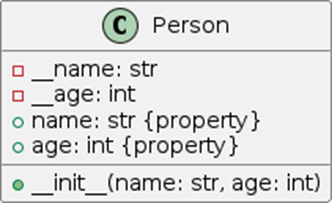

1. Atribut Privat (-):

  o	`__name`: str - disimpan secara internal, tidak bisa diakses langsung dari luar kelas.

  o	`__age`: int - juga bersifat privat.
2. Konstruktor (+   init  (name, age)):

  o	Digunakan untuk menginisialisasi objek dengan nilai awal untuk name dan age.
3. Property Methods ({property}):

  o	name dan age menggunakan dekorator @property, sehingga dapat digunakan seperti atribut biasa tapi dengan pengelolaan akses (getter/setter) di balik layar.


In [4]:
class Person:
    def __init__(self, name, age):
        """
        Konstruktor untuk menginisialisasi objek Person dengan nama dan umur.
        Atribut privat (dengan double underscore) menyimpan data internal.
        """
        self.__name = name
        self.__age = age

    @property
    def name(self):
        """
        Getter untuk atribut name.
        Mengembalikan nilai dari __name.
        """
        return self.__name

    @name.setter
    def name(self, value):
        """
        Setter untuk atribut name.
        Memeriksa apakah nilai tidak kosong sebelum mengubah nilai __name.
        """
        if not value:
            print("Nama tidak boleh kosong.")
        else:
            self.__name = value

    @property
    def age(self):
        """
        Getter untuk atribut age.
        Mengembalikan nilai dari __age.
        """
        return self.__age

    @age.setter
    def age(self, value):
        """
        Setter untuk atribut age.
        Memeriksa apakah nilai umur tidak negatif sebelum mengubah nilai __age.
        """
        if value < 0:
            print("Umur tidak boleh negatif!")
        else:
            self.__age = value


# Contoh penggunaan
def main():
    # Membuat objek Person dengan nama "Alice" dan umur 30
    person = Person("Alice", 30)
    print(f"Nama: {person.name}, Umur: {person.age}")

    # Mengubah nama dan umur melalui setter
    person.name = "Bob"
    person.age = 35
    print(f"Nama baru: {person.name}, Umur baru: {person.age}")

    # Mencoba menetapkan nilai yang tidak valid untuk umur
    person.age = -5  # Akan memunculkan pesan error karena validasi umur negatif


if __name__ == "__main__":
    main()


Nama: Alice, Umur: 30
Nama baru: Bob, Umur baru: 35
Umur tidak boleh negatif!


#### Penjelasan
1.	Atribut Privat

  •	self.	name dan self.	age di dalam konstruktor disembunyikan agar tidak dapat diakses atau diubah langsung dari luar kelas.
2.	Getter dengan @property

  •	Metode name dan age yang didekorasi dengan @property berfungsi sebagai getter untuk mengembalikan nilai atribut privat.

  •	Contoh: person.name akan mengembalikan nilai  name tanpa mengaksesnya secara langsung.
3.	Setter dengan @.setter
  •	Metode name dan age dilengkapi	dengan	setter	yang	didekorasi dengan @name.setter dan @age.setter.

  •	Setter digunakan untuk melakukan validasi (misalnya, nama tidak boleh kosong dan umur tidak boleh negatif) sebelum mengubah nilai atribut privat.
4.	Contoh Penggunaan
  •	Objek dibuat dengan parameter awal.

  •	Akses dan modifikasi atribut dilakukan melalui property, sehingga jika ada perubahan yang tidak memenuhi validasi, pesan error akan ditampilkan.

Kode  ini  memberikan  gambaran  bagaimana  penggunaan getter, setter,  dan dekorator @property membantu dalam mengelola dan memvalidasi akses ke atribut privat dalam sebuah kelas.